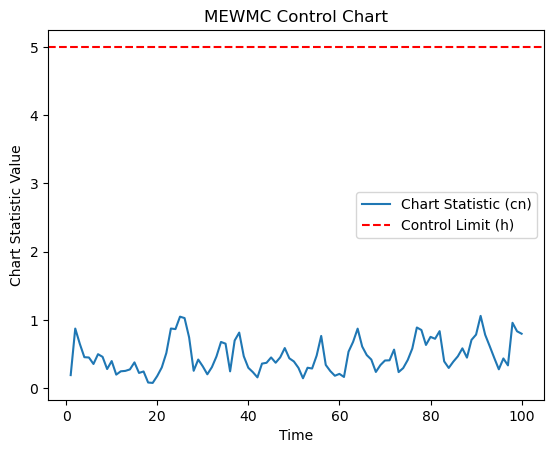

In [1]:
# Dawar Qureshi (October 2023)
import numpy as np
import matplotlib.pyplot as plt

def simulate_mewmc_control_chart(n, p, alpha, h):
    """
    Simulate and plot a Multivariate Exponentially Weighted Moving Covariance Control Chart (MEWMC).

    Parameters:
    - n (int): Number of data points.
    - p (int): Number of variables.
    - alpha (float): Smoothing factor.
    - h (float): Control limit.

    Returns:
    - None
    """
    
    # Initialize MEWMC variables
    S = np.identity(p)  # Initial covariance matrix (identity matrix)
    cn_values = []  # To store chart statistic values

    # Simulate multivariate data 
    np.random.seed(0)
    data = np.random.multivariate_normal(mean=np.zeros(p), cov=np.identity(p), size=n)

    # MEWMC Algorithm
    for i in range(n):
        # Compute MEWMC covariance matrix
        x = data[i]  # Current data point
        S = (1 - alpha) * S + alpha * np.outer(x, x)

        # Compute chart statistic (cn)
        det_S = np.linalg.det(S)
        log_det_S = np.log(det_S)
        cn = np.trace(S) - log_det_S - p

        cn_values.append(cn)

        # Check for out-of-control signal
        if cn > h:
            print(f"Out-of-control signal detected at time {i+1} (cn = {cn})")

    # Plot chart statistic values over time
    plt.plot(range(1, n+1), cn_values, label='Chart Statistic (cn)')
    plt.axhline(h, color='red', linestyle='--', label='Control Limit (h)')
    plt.xlabel('Time')
    plt.ylabel('Chart Statistic Value')
    plt.legend()
    plt.title('MEWMC Control Chart')
    plt.show()

if __name__ == "__main__":
    # Example parameters
    n = 100  # Number of data points
    p = 3    # Number of variables
    alpha = 0.2  # Smoothing factor
    h = 5.0  # Control limit

    # Simulate and plot the MEWMC control chart with example data
    simulate_mewmc_control_chart(n, p, alpha, h)
